# Basic Image classification task

In [1]:
# openml imports
import openml
import openml_pytorch
from openml_pytorch.callbacks import TestCallback
from openml_pytorch.metrics import accuracy
from openml_pytorch.trainer import OpenMLDataModule, OpenMLTrainerModule, convert_to_rgb

# pytorch imports
from torch.utils.tensorboard.writer import SummaryWriter
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, Lambda
import torchvision

# other imports
import logging
import warnings

# set up logging
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
# openml.config.start_using_configuration_for_example()
warnings.simplefilter(action='ignore')

/Users/smukherjee/.pyenv/versions/3.11.9/envs/openmlpytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

### Define image transformations


In [2]:

transform = Compose(
    [
        ToPILImage(),  # Convert tensor to PIL Image to ensure PIL Image operations can be applied.
        Lambda(convert_to_rgb),  # Convert PIL Image to RGB if it's not already.
        Resize((64, 64)),  # Resize the image.
        ToTensor(),  # Convert the PIL Image back to a tensor.
    ]
)


### Configure the Data Module and Choose a Task
- Make sure the data is present in the `file_dir` directory, and the `filename_col` is correctly set along with this column correctly pointing to where your data is stored. 


In [3]:
data_module = OpenMLDataModule(
    type_of_data="image",
    file_dir="datasets",
    filename_col="image_path",
    target_mode="categorical",
    target_column="label",
    batch_size=64,
    transform=transform,
)

# Download the OpenML task for tiniest imagenet
task = openml.tasks.get_task(362128)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


## Model

In [4]:
model = torchvision.models.resnet18(num_classes=200)

## Train your model on the data
- Note that by default, OpenML runs a 10 fold cross validation on the data. You cannot change this for now.

In [5]:
trainer = OpenMLTrainerModule(
    experiment_name= "Tiny ImageNet, 1 epoch",
    data_module=data_module,
    verbose=True,
    epoch_count=1,
    metrics= [accuracy],
    # remove the TestCallback when you are done testing your pipeline. Having it here will make the pipeline run for a very short time.
    callbacks=[
        TestCallback,
    ],
)
openml_pytorch.config.trainer = trainer
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.5172, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.4275, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.5042, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.4880, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.4139, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.3990, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.4814, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.5426, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.5135, device='mps:0', grad_fn=<NllLossBackward0>)


Could not download file from https://openml1.win.tue.nl/datasets/0004/46347/dataset_46347.pq: HTTPConnectionPool(host='openml1.win.tue.nl', port=80): Max retries exceeded with url: /datasets/0004/46347/dataset_46347.pq (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Loss tensor(5.5760, device='mps:0', grad_fn=<NllLossBackward0>)


## testing push


In [17]:
backup_run = run

In [13]:
run = backup_run

In [29]:
run = openml_pytorch.add_onnx_to_run(run)

In [ ]:
run.publish()

In [ ]:
openml.runs.get_run(10595159).setup_string

## View information about your run

### Learning rate and loss plot

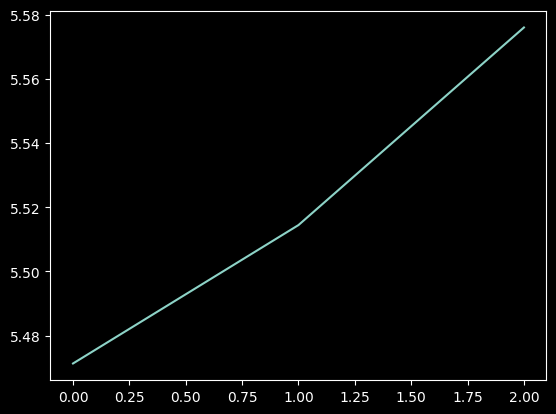

In [10]:
trainer.plot_loss()

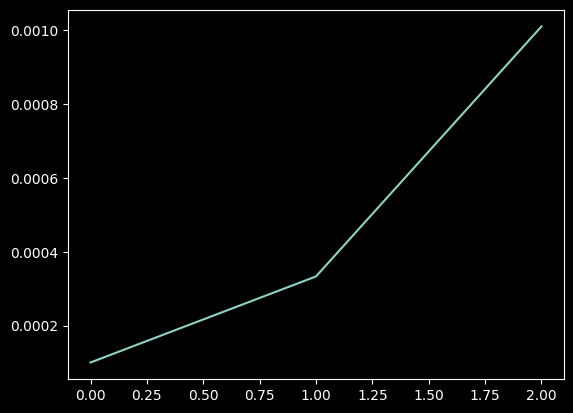

In [11]:
trainer.plot_lr()

### Class labels

In [12]:
trainer.model_classes

array(['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640',
       'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750',
       'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289',
       'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695',
       'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620',
       'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799',
       'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165',
       'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429',
       'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972',
       'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003',
       'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495',
       'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196',
       'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148',
       'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n028

In [15]:
trainer.cbfs

[openml_pytorch.callbacks.Recorder,
 functools.partial(<class 'openml_pytorch.callbacks.AvgStatsCallback'>, <function accuracy at 0x323777420>),
 functools.partial(<class 'openml_pytorch.callbacks.ParamScheduler'>, 'lr', <function combine_scheds.<locals>._inner at 0x32430eb60>),
 functools.partial(<class 'openml_pytorch.callbacks.PutDataOnDeviceCallback'>, device(type='mps')),
 functools.partial(<class 'openml_pytorch.callbacks.TensorBoardCallback'>, <torch.utils.tensorboard.writer.SummaryWriter object at 0x324320310>),
 openml_pytorch.callbacks.TestCallback]

In [16]:
trainer.experiment_name

'Tiny ImageNet, 1 epoch'

In [18]:
trainer.model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Model Vizualization
- Sometimes you may want to visualize the model. You can either use netron or tensorboard for this purpose.

### Netron

In [13]:
trainer.export_to_netron()

Writing onnx model to model.onnx. Delete if neeeded
Serving 'model.onnx' at http://localhost:8080


### Tensorboard
- By default, openml will log the tensorboard logs in the `tensorboard_logs` directory. You can view the logs by running `tensorboard --logdir tensorboard_logs` in the terminal.

## Publish your model to OpenML
- This is Optional, but publishing your model to OpenML will allow you to track your experiments and compare them with others.
- Make sure to set your apikey first.
  - You can find your apikey on your OpenML account page.

In [ ]:
run.publish()

# Pretrained Transformer Image Classification Task

In [ ]:
# openml imports
import openml
import openml_pytorch
from openml_pytorch.callbacks import TestCallback
from openml_pytorch.metrics import accuracy
from openml_pytorch.trainer import OpenMLDataModule, OpenMLTrainerModule, convert_to_rgb

# pytorch imports
from torch.utils.tensorboard.writer import SummaryWriter
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, Lambda
import torchvision

# other imports
import logging
import warnings

# set up logging
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
warnings.simplefilter(action='ignore')

## Data

### Define image transformations


In [ ]:

transform = Compose(
    [
        ToPILImage(),  # Convert tensor to PIL Image to ensure PIL Image operations can be applied.
        Lambda(convert_to_rgb),  # Convert PIL Image to RGB if it's not already.
        Resize((64, 64)),  # Resize the image.
        ToTensor(),  # Convert the PIL Image back to a tensor.
    ]
)


### Configure the Data Module and Choose a Task
- Make sure the data is present in the `file_dir` directory, and the `filename_col` is correctly set along with this column correctly pointing to where your data is stored. 


In [ ]:
data_module = OpenMLDataModule(
    type_of_data="image",
    file_dir="datasets",
    filename_col="image_path",
    target_mode="categorical",
    target_column="label",
    batch_size=64,
    transform=transform,
)

# Download the OpenML task for tiniest imagenet
task = openml.tasks.get_task(362128)


## Model

In [ ]:
# Example model. You can do better :)
import torchvision.models as models
import torch.nn as nn

# Load the pre-trained model
model = models.efficientnet_b0(pretrained=True)

# Modify the last fully connected layer to the required number of classes
num_classes = 200
in_features = model.classifier[-1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features, num_classes),
)

# Optional: If you're fine-tuning, you may want to freeze the pre-trained layers
# for param in model.parameters():
#     param.requires_grad = False

# # If you want to train the last layer only (the newly added layer)
# for param in model.fc.parameters():
#     param.requires_grad = True

## Train your model on the data
- Note that by default, OpenML runs a 10 fold cross validation on the data. You cannot change this for now.

In [ ]:


trainer = OpenMLTrainerModule(
    experiment_name= "Tiny ImageNet",
    data_module=data_module,
    verbose=True,
    epoch_count=1,
    metrics= [accuracy],
    # remove the TestCallback when you are done testing your pipeline. Having it here will make the pipeline run for a very short time.
    callbacks=[
        TestCallback,
    ],
)
openml_pytorch.config.trainer = trainer
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

## View information about your run

### Learning rate and loss plot

In [ ]:
trainer.plot_loss()

In [ ]:
trainer.plot_lr()

### Class labels

In [ ]:
trainer.model_classes

## Model Vizualization
- Sometimes you may want to visualize the model. You can either use netron or tensorboard for this purpose.

### Netron

In [ ]:
trainer.export_to_netron()

### Tensorboard
- By default, openml will log the tensorboard logs in the `tensorboard_logs` directory. You can view the logs by running `tensorboard --logdir tensorboard_logs` in the terminal.

## Publish your model to OpenML
- This is Optional, but publishing your model to OpenML will allow you to track your experiments and compare them with others.
- Make sure to set your apikey first.
  - You can find your apikey on your OpenML account page.

In [ ]:
openml.config.apikey = ''
run.publish()

# Choose a custom Optimizer
- If you want to use a custom optimizer, you can do so by defining the optimizer in the `optimizer` variable.

In [1]:
# openml imports
import openml
import openml_pytorch
from openml_pytorch.callbacks import TestCallback
from openml_pytorch.metrics import accuracy
from openml_pytorch.trainer import OpenMLDataModule, OpenMLTrainerModule, convert_to_rgb

# pytorch imports
from torch.utils.tensorboard.writer import SummaryWriter
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, Lambda
import torchvision

# other imports
import logging
import warnings

# set up logging
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
warnings.simplefilter(action='ignore')

## Data

### Define image transformations


In [2]:

transform = Compose(
    [
        ToPILImage(),  # Convert tensor to PIL Image to ensure PIL Image operations can be applied.
        Lambda(convert_to_rgb),  # Convert PIL Image to RGB if it's not already.
        Resize((64, 64)),  # Resize the image.
        ToTensor(),  # Convert the PIL Image back to a tensor.
    ]
)


### Configure the Data Module and Choose a Task
- Make sure the data is present in the `file_dir` directory, and the `filename_col` is correctly set along with this column correctly pointing to where your data is stored. 


In [3]:
data_module = OpenMLDataModule(
    type_of_data="image",
    file_dir="datasets",
    filename_col="image_path",
    target_mode="categorical",
    target_column="label",
    batch_size=64,
    transform=transform,
)

# Download the OpenML task for tiniest imagenet
task = openml.tasks.get_task(362128)


## Model

In [4]:
model = torchvision.models.resnet18(num_classes=200)

## Train your model on the data
- Choose a custom optimizer by defining the optimizer variable.
- Note that by default, OpenML runs a 10 fold cross validation on the data. You cannot change this for now.

In [5]:
import torch
from torch.optim import Adam, Optimizer
from openml_pytorch.trainer import OpenMLTask

def custom_optimizer_gen(model: torch.nn.Module, task: OpenMLTask) -> Optimizer:
    # replace the optimizer with your own
    return Adam(model.fc.parameters())


In [ ]:
trainer = OpenMLTrainerModule(
    experiment_name= "Tiny ImageNet",
    data_module=data_module,
    verbose=True,
    epoch_count=1,
    metrics= [accuracy],
    # remove the TestCallback when you are done testing your pipeline. Having it here will make the pipeline run for a very short time.
    callbacks=[
        TestCallback,
    ],
    optimizer = custom_optimizer_gen,
)
openml_pytorch.config.trainer = trainer
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

## View information about your run

### Learning rate and loss plot

In [ ]:
trainer.plot_loss()

In [ ]:
trainer.plot_lr()

### Class labels

In [ ]:
trainer.model_classes

## Model Vizualization
- Sometimes you may want to visualize the model. You can either use netron or tensorboard for this purpose.

### Netron

In [ ]:
trainer.export_to_netron()

### Tensorboard
- By default, openml will log the tensorboard logs in the `tensorboard_logs` directory. You can view the logs by running `tensorboard --logdir tensorboard_logs` in the terminal.

## Publish your model to OpenML
- This is Optional, but publishing your model to OpenML will allow you to track your experiments and compare them with others.
- Make sure to set your apikey first.
  - You can find your apikey on your OpenML account page.

In [ ]:
openml.config.apikey = ''
run.publish()

# Sequential Classification Task
- Sequential classification of a tabular MNIST dataset (Task 3573) using a simple neural network.

In [4]:
# openml imports
import openml
import openml_pytorch
from openml_pytorch.callbacks import TestCallback
from openml_pytorch.metrics import accuracy
from openml_pytorch.trainer import OpenMLDataModule, OpenMLTrainerModule, convert_to_rgb

# pytorch imports
import torch

# other imports
import logging
import warnings

# set up logging
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
warnings.simplefilter(action='ignore')

## Data

### Configure the Data Module and Choose a Task
- Make sure the data is present in the `file_dir` directory, and the `filename_col` is correctly set along with this column correctly pointing to where your data is stored. 


In [5]:
data_module = OpenMLDataModule(
    type_of_data="dataframe",
    filename_col="class",
    target_mode="categorical",
)

# Download the OpenML task for the mnist 784 dataset.
task = openml.tasks.get_task(3573)

## Model

In [6]:

############################################################################
# Define a sequential network that does the initial image reshaping
# and normalization model.
processing_net = torch.nn.Sequential(
    openml_pytorch.layers.Functional(function=torch.Tensor.reshape,
                                                shape=(-1, 1, 28, 28)),
    torch.nn.BatchNorm2d(num_features=1)
)
############################################################################

############################################################################
# Define a sequential network that does the extracts the features from the
# image.
features_net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    torch.nn.LeakyReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    torch.nn.LeakyReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
)
############################################################################

############################################################################
# Define a sequential network that flattens the features and compiles the
# results into probabilities for each digit.
results_net = torch.nn.Sequential(
    openml_pytorch.layers.Functional(function=torch.Tensor.reshape,
                                                shape=(-1, 4 * 4 * 64)),
    torch.nn.Linear(in_features=4 * 4 * 64, out_features=256),
    torch.nn.LeakyReLU(),
    torch.nn.Dropout(),
    torch.nn.Linear(in_features=256, out_features=10),
)
############################################################################
# openml.config.apikey = 'key'

############################################################################
# The main network, composed of the above specified networks.
model = torch.nn.Sequential(
    processing_net,
    features_net,
    results_net
)
############################################################################


## Train your model on the data
- Note that by default, OpenML runs a 10 fold cross validation on the data. You cannot change this for now.

In [ ]:
trainer = OpenMLTrainerModule(
    experiment_name= "MNIST",
    data_module=data_module,
    verbose=True,
    epoch_count=1,
    metrics= [accuracy],
    # remove the TestCallback when you are done testing your pipeline. Having it here will make the pipeline run for a very short time.
    callbacks=[
        TestCallback,
    ],
)
openml_pytorch.config.trainer = trainer
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

## View information about your run

### Learning rate and loss plot

In [ ]:
trainer.plot_loss()

In [ ]:
trainer.plot_lr()

### Class labels

In [ ]:
trainer.model_classes

## Model Vizualization
- Sometimes you may want to visualize the model. You can either use netron or tensorboard for this purpose.

### Netron

In [ ]:
trainer.export_to_netron()

### Tensorboard
- By default, openml will log the tensorboard logs in the `tensorboard_logs` directory. You can view the logs by running `tensorboard --logdir tensorboard_logs` in the terminal.

## Publish your model to OpenML
- This is Optional, but publishing your model to OpenML will allow you to track your experiments and compare them with others.
- Make sure to set your apikey first.
  - You can find your apikey on your OpenML account page.

In [ ]:
openml.config.apikey = ''
run.publish()

# Tabular classification
- Supervised credit-g classification

In [19]:
# openml imports
import openml
import openml_pytorch
from openml_pytorch.callbacks import TestCallback
from openml_pytorch.metrics import accuracy
from openml_pytorch.trainer import OpenMLDataModule, OpenMLTrainerModule, convert_to_rgb

# pytorch imports
import torch

# other imports
import logging
import warnings

# set up logging
openml.config.logger.setLevel(logging.DEBUG)
openml_pytorch.config.logger.setLevel(logging.DEBUG)
warnings.simplefilter(action='ignore')

## Data

### Define image transformations


### Configure the Data Module and Choose a Task
- Make sure the data is present in the `file_dir` directory, and the `filename_col` is correctly set along with this column correctly pointing to where your data is stored. 


In [20]:
data_module = OpenMLDataModule(
    type_of_data="dataframe",
    target_column="class",
    target_mode="categorical",
)

# supervised credit-g classification
task = openml.tasks.get_task(31)


## Model

In [21]:
class TabularClassificationmodel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(TabularClassificationmodel, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, output_size)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x
    
model = TabularClassificationmodel(20, 2)

## Train your model on the data
- Note that by default, OpenML runs a 10 fold cross validation on the data. You cannot change this for now.

In [22]:


trainer = OpenMLTrainerModule(
    experiment_name= "Credit-G",
    data_module=data_module,
    verbose=True,
    epoch_count=5,
    metrics= [accuracy],
    # remove the TestCallback when you are done testing your pipeline. Having it here will make the pipeline run for a very short time.
    callbacks=[
        TestCallback,
    ],
)
openml_pytorch.config.trainer = trainer
run = openml.runs.run_model_on_task(model, task, avoid_duplicate_runs=False)

DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 0 sample 0
DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 1 sample 0


Loss tensor(0.5476, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 2 sample 0


Loss tensor(0.5008, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 3 sample 0


Loss tensor(0.5320, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 4 sample 0


Loss tensor(0.5789, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 5 sample 0


Loss tensor(0.5789, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 6 sample 0


Loss tensor(0.6570, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 7 sample 0


Loss tensor(0.6570, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 8 sample 0


Loss tensor(0.5789, device='mps:0', grad_fn=<NllLossBackward0>)


DEBUG:openml.config:Requested to create log handlers, but they are already created.
INFO:openml.config:Going to run model TabularClassificationmodel(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
) on dataset credit-g for repeat 0 fold 9 sample 0


Loss tensor(0.5633, device='mps:0', grad_fn=<NllLossBackward0>)


INFO:openml.config:Executed Task 31 on local Flow with name torch.nn.TabularClassificationmodel.306b47fb388f424e.


Loss tensor(0.5476, device='mps:0', grad_fn=<NllLossBackward0>)


## View information about your run

### Learning rate and loss plot

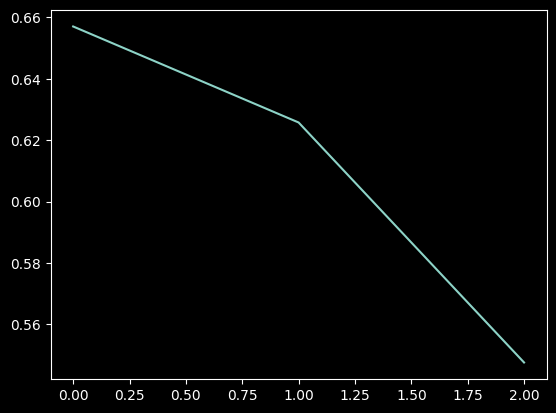

In [23]:
trainer.plot_loss()

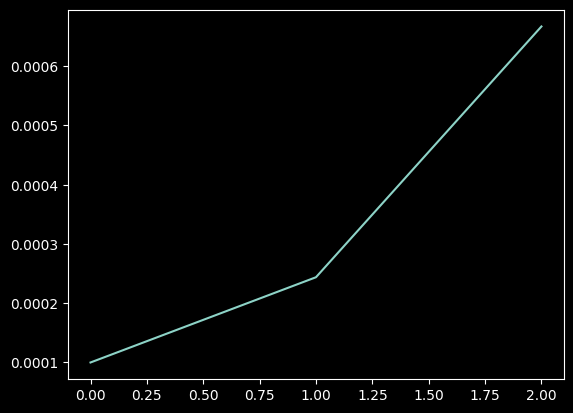

In [24]:
trainer.plot_lr()

### Class labels

In [25]:
trainer.model_classes

array(['bad', 'good'], dtype=object)

## Model Vizualization
- Sometimes you may want to visualize the model. You can either use netron or tensorboard for this purpose.

### Netron

In [27]:
trainer.export_to_netron()

Writing onnx model to model.onnx. Delete if neeeded
Serving 'model.onnx' at http://localhost:22126


### Tensorboard
- By default, openml will log the tensorboard logs in the `tensorboard_logs` directory. You can view the logs by running `tensorboard --logdir tensorboard_logs` in the terminal.

## Publish your model to OpenML
- This is Optional, but publishing your model to OpenML will allow you to track your experiments and compare them with others.
- Make sure to set your apikey first.
  - You can find your apikey on your OpenML account page.

In [ ]:
openml.config.apikey = ''
run.publish()